<a href="https://colab.research.google.com/github/yashukaushik01/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Twitter Sentiment Analysis**

---


In [ ]:
#@title Import Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#@title Making Tweepy Object
accessToken = '853589383831851010-S1G2nVWzD471mPciMJOmZGHWeV1pJle'
accessTokenSecret = 'O09HnlrFsl94uEYOZ3KnCOSSvHlN8kIv0iTiP1aHz5ZDk'
authenticate = tweepy.OAuthHandler(consumer_key='qm2SB0EhIWfDeVMVatmc3r0Y7', consumer_secret='MuFjZj4Viy3SDbyUxTjcB1C3hlkZawRrUPTMyBsGYeXIqOko6z')
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#@title Extracting Tweets
# Extract 100 tweets from twitter user
posts = api.user_timeline(screen_name = "JoeBiden", count = 200, lang = "en", tweet_mode = "extended")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

1) Since the beginning of our administration, the economy has added more than 1.5 million jobs. 

We’ve still got work to do, but America is moving in the right direction. https://t.co/B0bNPXNSKe

2) RT @POTUS: Tune in as I discuss the April jobs report. https://t.co/BUZiB5w1gj

3) RT @WhiteHouse: This week we launched the Restaurant Revitalization Fund to provide direct relief to restaurants and other hard-hit food es…

4) RT @POTUS: If we want our economy to recover in a way that deals everyone in, then our restaurants need a seat at the table — with the Amer…

5) RT @POTUS: Our goal by July 4th is to have 70% of adult Americans with at least one shot — and 160 million Americans fully vaccinated. It’s…



In [ ]:
#@title Head of DataFrame
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,"Since the beginning of our administration, the..."
1,RT @POTUS: Tune in as I discuss the April jobs...
2,RT @WhiteHouse: This week we launched the Rest...
3,RT @POTUS: If we want our economy to recover i...
4,RT @POTUS: Our goal by July 4th is to have 70%...


In [ ]:
#@title Cleaning the Tweet Data
# Cleaning the text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) 
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]:', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

df['Tweets'] = df['Tweets'].apply(cleanText)

df

,Tweets
0,"Since the beginning of our administration, the..."
1,Tune in as I discuss the April jobs report.
2,This week we launched the Restaurant Revitali...
3,If we want our economy to recover in a way th...
4,Our goal by July 4th is to have 70% of adult ...
...,...
195,"Tonight, in Washington, D.C. and across the na..."
196,We don’t have a second to waste when it comes ...
197,Join us for a national moment of unity and rem...
198,"Next stop: Washington, D.C."


In [ ]:
#@title Get Subjectivity and Polarity of Tweets
# create function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df


,Tweets,Subjectivity,Polarity
0,"Since the beginning of our administration, the...",0.517857,0.392857
1,Tune in as I discuss the April jobs report.,0.000000,0.000000
2,This week we launched the Restaurant Revitali...,0.387500,-0.012500
3,If we want our economy to recover in a way th...,0.000000,0.000000
4,Our goal by July 4th is to have 70% of adult ...,0.350000,-0.100000
...,...,...,...
195,"Tonight, in Washington, D.C. and across the na...",0.066667,0.000000
196,We don’t have a second to waste when it comes ...,0.178571,0.028571
197,Join us for a national moment of unity and rem...,0.375000,-0.125000
198,"Next stop: Washington, D.C.",0.000000,0.000000


<function matplotlib.pyplot.show>

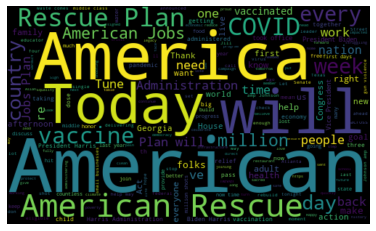

In [ ]:
#@title Word Cloud
# plotting word cloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [ ]:
#@title Analysis
# create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Since the beginning of our administration, the...",0.517857,0.392857,Positive
1,Tune in as I discuss the April jobs report.,0.000000,0.000000,Neutral
2,This week we launched the Restaurant Revitali...,0.387500,-0.012500,Negative
3,If we want our economy to recover in a way th...,0.000000,0.000000,Neutral
4,Our goal by July 4th is to have 70% of adult ...,0.350000,-0.100000,Negative
...,...,...,...,...
195,"Tonight, in Washington, D.C. and across the na...",0.066667,0.000000,Neutral
196,We don’t have a second to waste when it comes ...,0.178571,0.028571,Positive
197,Join us for a national moment of unity and rem...,0.375000,-0.125000,Negative
198,"Next stop: Washington, D.C.",0.000000,0.000000,Neutral


In [ ]:
#@title Positive Tweets
# print all the positive tweets
j = 1
sortedDf = df.sort_values(by = ['Polarity'])

for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDf['Tweets'][i])
    print()
    j = j + 1



1) Since the beginning of our administration, the economy has added more than 1.5 million jobs. 

We’ve still got work to do, but America is moving in the right direction. 

2)  Teachers are an extraordinary force for good in our nation — I’m lucky enough to be married to one and have seen firsthand how h…

3) America is on the move again. 

We are choosing hope over fear. 
Truth over lies. 
Light over darkness. 

There’s nothing we cannot do if we do it together.

4) We’ve never been more optimistic about the future of America. 

5) In Georgia with  to celebrate the successes of the first 100 days of the Biden-Harris administration. Jobs are coming back, folks are getting vaccinated, and better days are ahead. Tune in. 


6)  If we are to truly restore the soul of America, then we need to protect the sacred right to vote.

Congress should pass H.R. 1 a…

7) Together, we’re getting back on track. Tune in now for our administration’s first joint address to Congress. 

8)  To make tonigh

In [ ]:
#@title Negative Tweets
# print all the negative tweets
j = 1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1)  This week we launched the Restaurant Revitalization Fund to provide direct relief to restaurants and other hard-hit food es…

2)  Our goal by July 4th is to have 70% of adult Americans with at least one shot — and 160 million Americans fully vaccinated. It’s…

3)  The guilty verdict does not bring back George Floyd. But through the family’s pain, they are finding purpose so George’s legacy…

4)  Today, a jury in Minnesota found former Minneapolis Police Officer Derek Chauvin guilty of murdering George Floyd.
 
The verdict…

5)  “When the will defies fear, when duty throws the gauntlet down to fate, when honor scorns to compromise with death — that is her…

6)  Today I’m thinking about Daunte Wright and his family — and the pain, anger, and trauma that Black America experiences every day…

7)  Gun violence in this country is an epidemic — and it’s long past time Congress take action.

8) The American Jobs Plan is a once-in-a-generation investment in America. It will:
✅Modernize 20,0

In [ ]:
#@title Percentage of Posiitve Tweets
# Get the % of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

44.5

In [ ]:
#@title Percentage of Negative Tweets
# Get the % of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

14.0

In [ ]:
#@title Percentage of Neutral Tweets
# Get the % of neutral tweets
netweets = df[df.Analysis == 'Neutral']
netweets = netweets['Tweets']

round((netweets.shape[0] / df.shape[0]) * 100, 1)

41.5

<function matplotlib.pyplot.show>

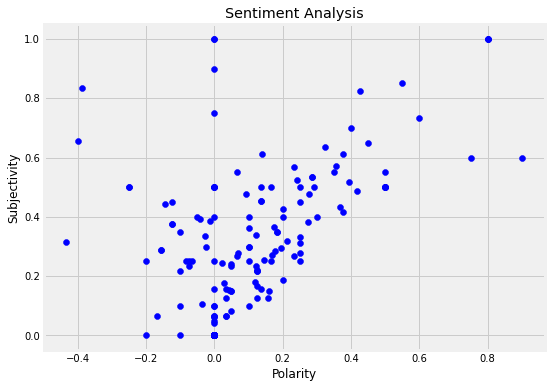

In [ ]:
#@title Plot of Subjectivity and Polarity
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

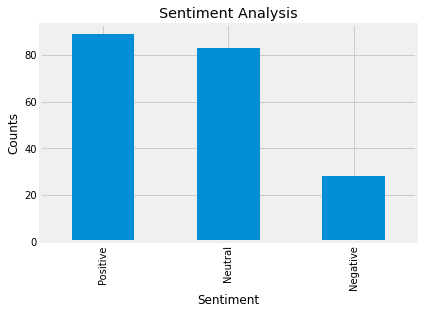

In [ ]:
#@title Graph of Positive, Negative and Neutral Tweets
# Show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


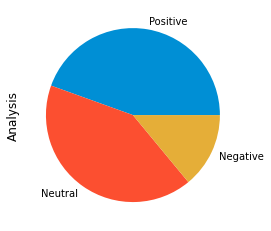

In [ ]:
#@title
df['Analysis'].value_counts().plot(kind='pie')
plt.show()